## Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house_data = pd.read_csv("housing.csv")

In [3]:
house_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
house_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
house_data_stage1= house_data.dropna()

In [7]:
house_data_stage1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## Split Data 

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X= house_data_stage1.drop(['median_house_value'],axis=1)
y= house_data_stage1['median_house_value']

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## Data Exploration

In [11]:
train_data= X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
16902,-122.35,37.58,52.0,2495.0,458.0,1081.0,471.0,4.0855,NEAR OCEAN,410800.0
9269,-122.54,38.14,16.0,4431.0,603.0,1659.0,630.0,7.5412,NEAR BAY,392100.0
1580,-122.02,37.87,14.0,3056.0,369.0,1209.0,377.0,8.4352,NEAR BAY,441400.0
20313,-119.14,34.15,25.0,2202.0,390.0,1415.0,412.0,4.4300,NEAR OCEAN,207700.0
7156,-118.15,34.04,44.0,647.0,142.0,457.0,143.0,3.6875,<1H OCEAN,162500.0
...,...,...,...,...,...,...,...,...,...,...
11519,-118.07,33.73,13.0,1822.0,313.0,643.0,303.0,9.8346,NEAR OCEAN,401700.0
3489,-118.45,34.28,38.0,1527.0,332.0,1303.0,340.0,3.5714,<1H OCEAN,152000.0
6424,-118.00,34.14,39.0,1302.0,303.0,800.0,291.0,3.2723,INLAND,166900.0
4665,-118.30,34.05,31.0,1744.0,720.0,2034.0,633.0,2.2684,<1H OCEAN,193800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

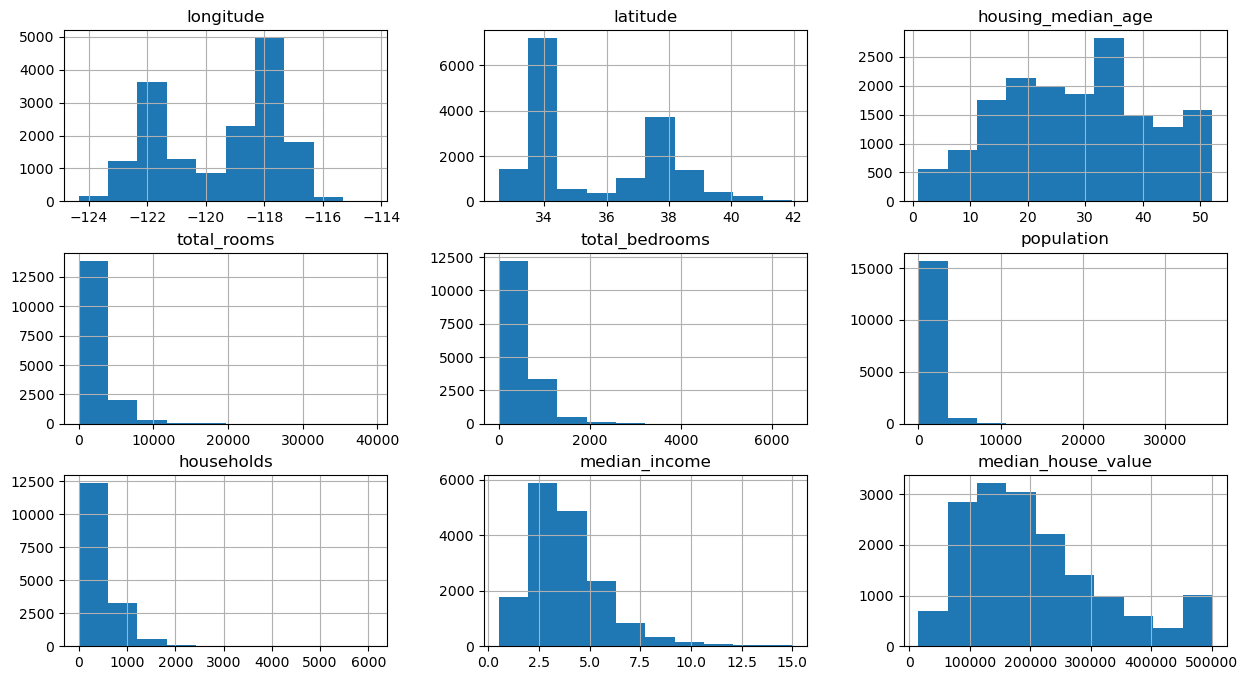

In [12]:
train_data.hist(figsize=(15,8))

In [13]:
train_data_without_ocean_proximity= train_data.drop(['ocean_proximity'],axis=1)
train_data_without_ocean_proximity.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924715,-0.114296,0.049387,0.073710,0.102979,0.059793,-0.013861,-0.046450
latitude,-0.924715,1.000000,0.016392,-0.040933,-0.071373,-0.112820,-0.075985,-0.080074,-0.143049
housing_median_age,-0.114296,0.016392,1.000000,-0.360230,-0.320906,-0.295354,-0.303515,-0.123174,0.104238
total_rooms,0.049387,-0.040933,-0.360230,1.000000,0.930845,0.853363,0.918686,0.200659,0.135187
total_bedrooms,0.073710,-0.071373,-0.320906,0.930845,1.000000,0.873458,0.979001,-0.005400,0.050849
population,0.102979,-0.112820,-0.295354,0.853363,0.873458,1.000000,0.904254,0.008451,-0.023150
households,0.059793,-0.075985,-0.303515,0.918686,0.979001,0.904254,1.000000,0.015619,0.067107
median_income,-0.013861,-0.080074,-0.123174,0.200659,-0.005400,0.008451,0.015619,1.000000,0.688234
median_house_value,-0.046450,-0.143049,0.104238,0.135187,0.050849,-0.023150,0.067107,0.688234,1.000000


<Axes: >

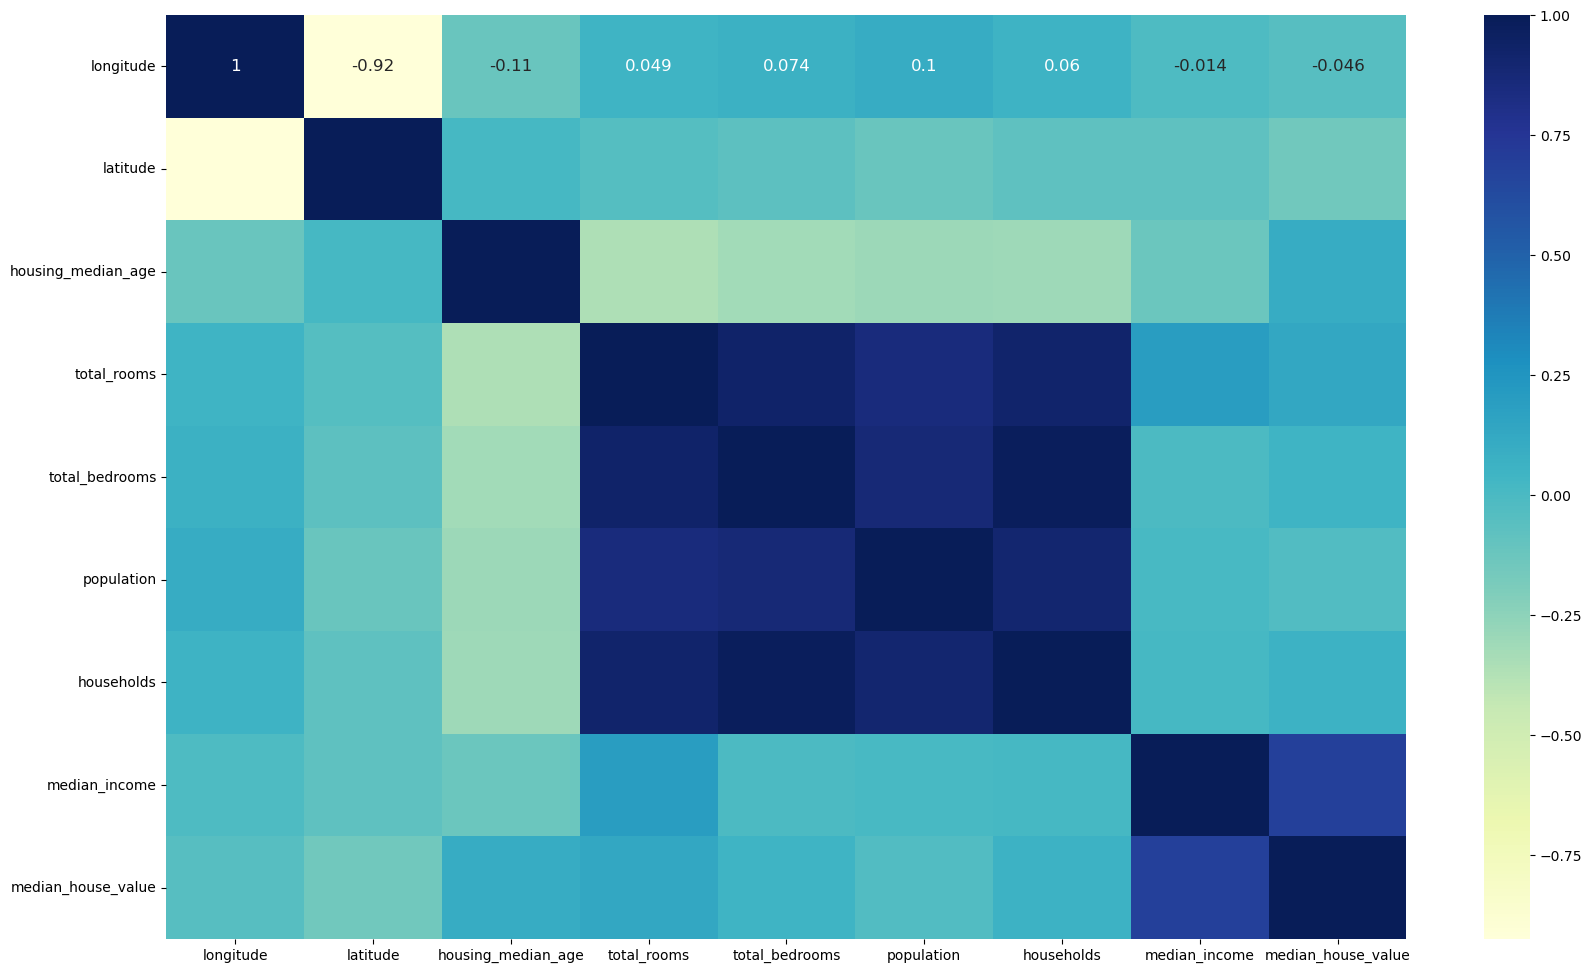

In [14]:
plt.figure(figsize=(20,12))
sns.heatmap(train_data_without_ocean_proximity.corr(),annot=True, cmap="YlGnBu",annot_kws={"size": 12})

## Data Preprocessing

In [15]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

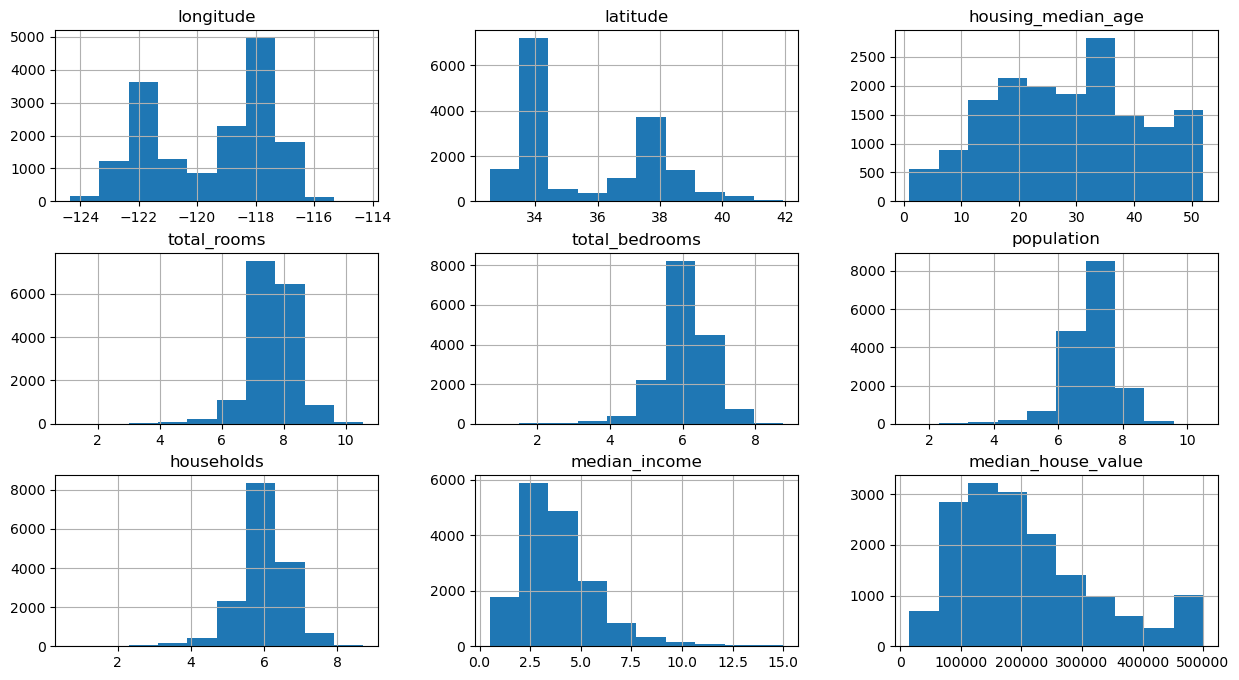

In [16]:
train_data.hist(figsize=(15,8))

In [17]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7222
INLAND        5169
NEAR OCEAN    2132
NEAR BAY      1820
ISLAND           3
Name: count, dtype: int64

In [18]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

<Axes: >

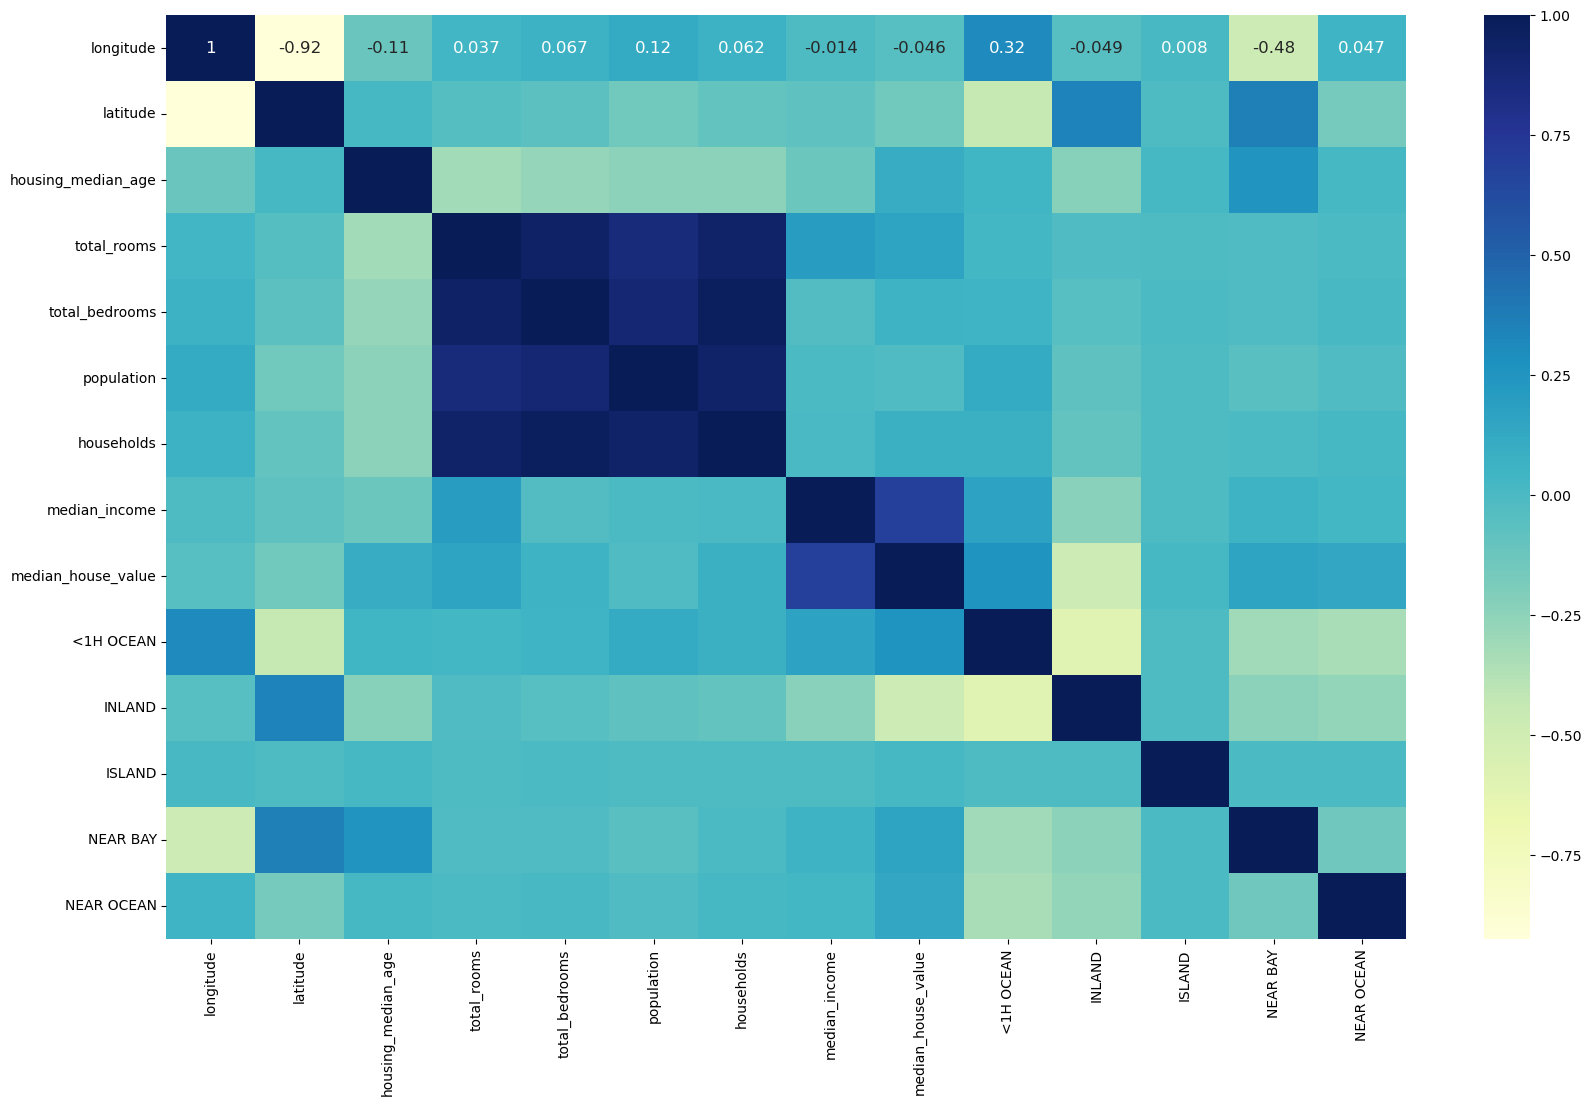

In [19]:
plt.figure(figsize=(20,12))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu",annot_kws={"size": 12})

<Axes: xlabel='latitude', ylabel='longitude'>

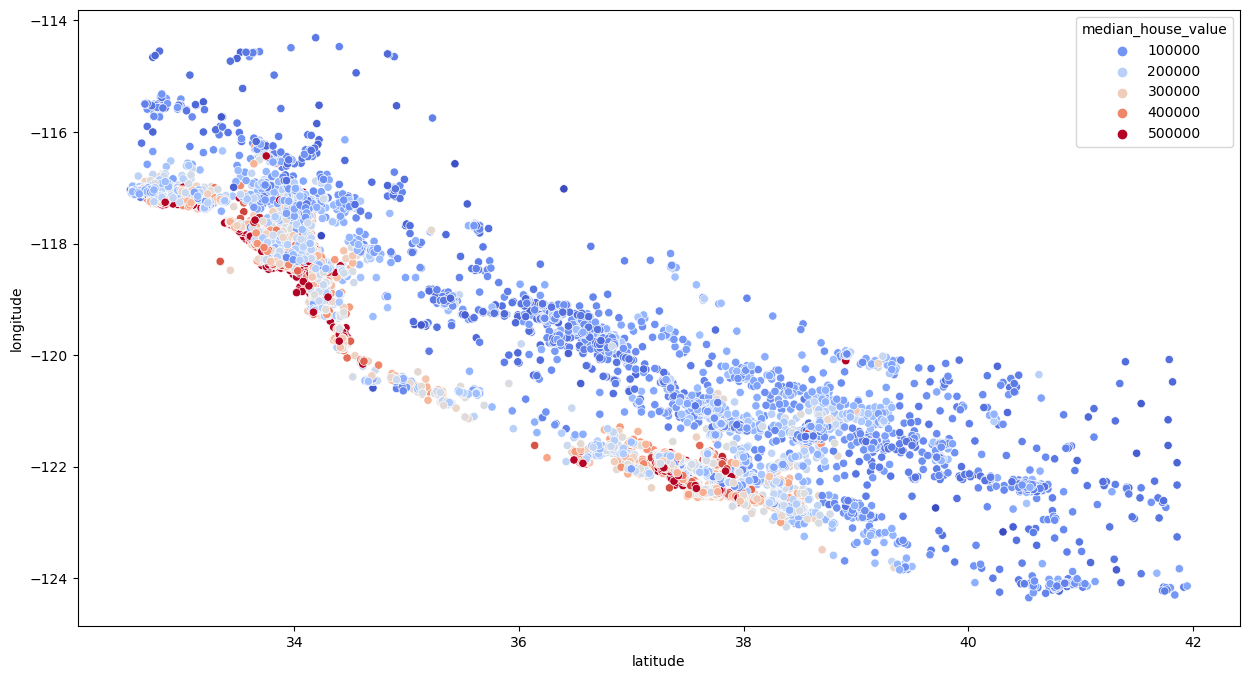

In [20]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude', data=train_data, hue='median_house_value'
                ,palette='coolwarm')

## Features Engineering

In [21]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/ train_data['total_rooms']

In [22]:
train_data['household_rooms'] = train_data['total_rooms']/ train_data['households']

<Axes: >

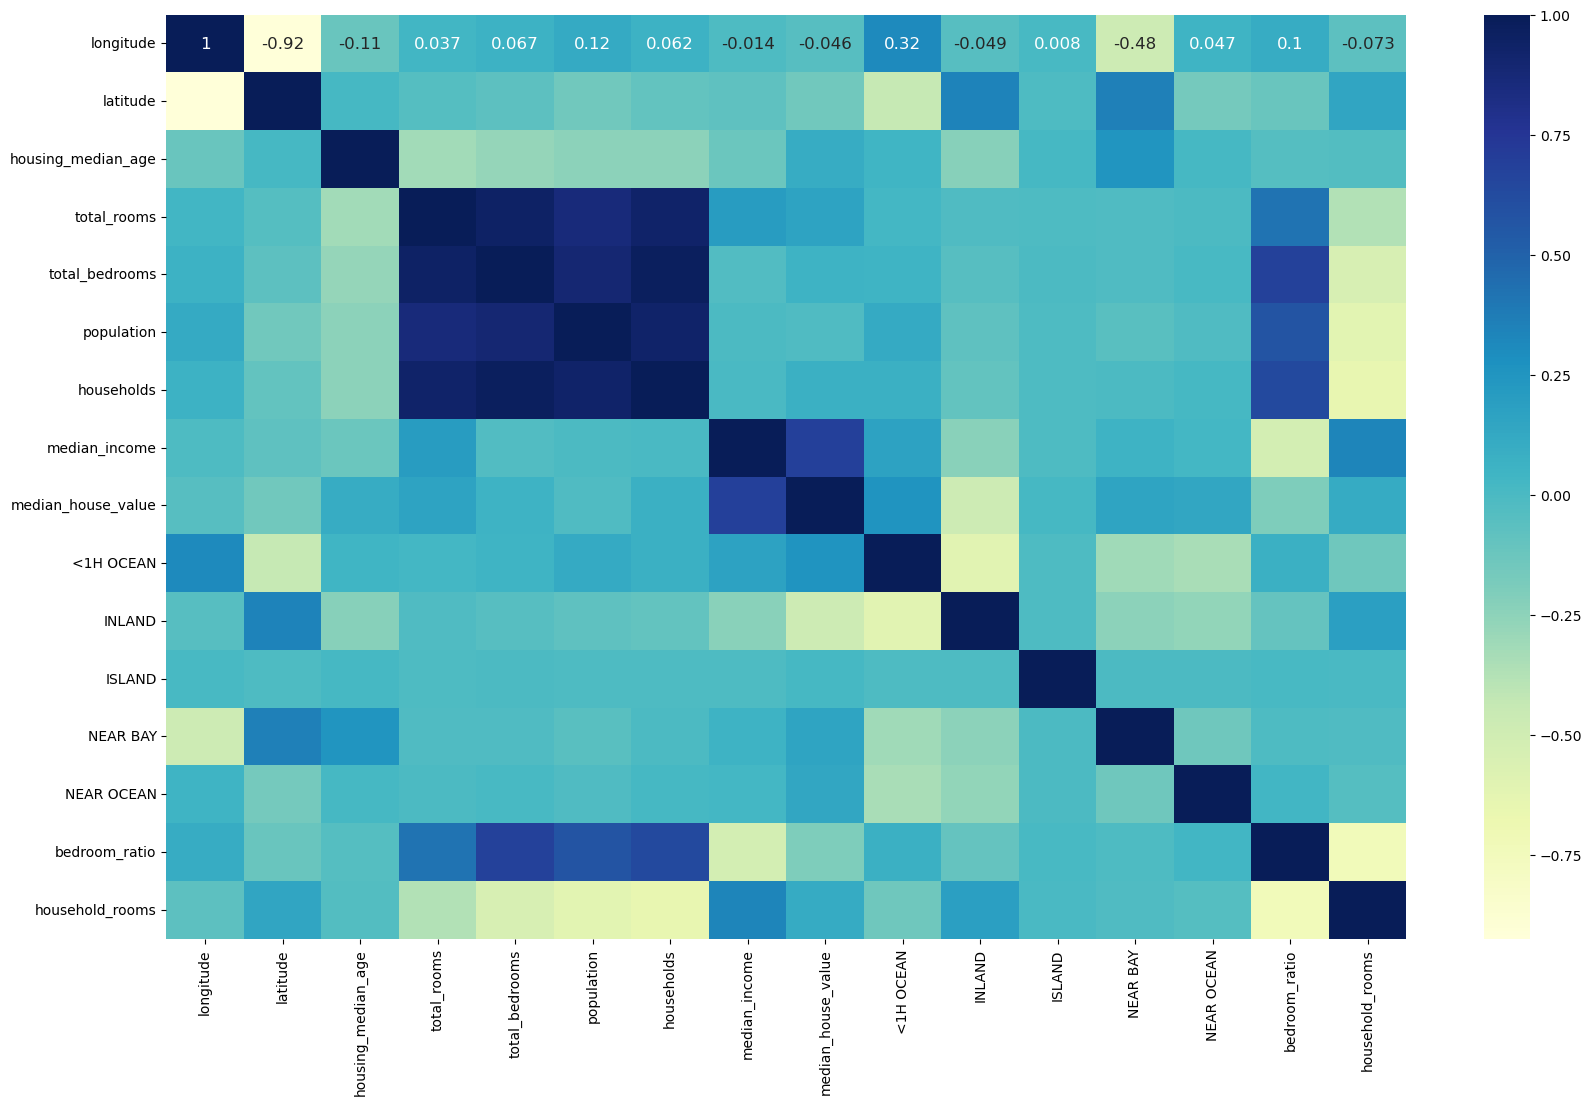

In [23]:
plt.figure(figsize=(20,12))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu",annot_kws={"size": 12})

## Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
X_train=train_data.drop(['median_house_value'],axis=1)
y_train=train_data['median_house_value']

In [26]:
model = LinearRegression().fit(X_train,y_train)

In [27]:
test_data= X_test.join(y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/ test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/ test_data['households']

In [28]:
X_test=test_data.drop(['median_house_value'],axis=1)
y_test=test_data['median_house_value']

In [34]:
model.score(X_test,y_test)

0.6742045735537039

## Random Forest Model

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
forest = RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [37]:
forest.score(X_test,y_test)

0.8237255937264317

In [ ]:
from sklearn.model_selection import GridSearchCV

forest =RandomForestRegressor()
param_grid = {"n_estimators":[100,200,300],
             "min_samples_split":[2,4],
              "max_depth":[None,4,8]
             }

grid_search = GridSearchCV(forest, param_grid,cv=5, 
                           scoring="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.best_estimator_.score(X_test,y_test)